### inverse sampling

- ***sampling*** refers to the process of drawing samples from a data distribution
- *inverse sampling* is a method to draw samples from a cumulative distribution function (cdf)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme() # Setting seaborn style

In [2]:
iris = sns.load_dataset("iris")

#### cdf function

In [3]:
from sklearn.neighbors import KernelDensity

In [4]:
def mycdf(data, kernel = 'gaussian', bandwidth = 0.2, bin_width = 0.2):
    kde = KernelDensity(kernel = 'gaussian', bandwidth = bandwidth).fit(np.array(data)[:, None])
    bins = np.round(np.arange(data.min() -0.4, data.max() +0.4, step = bin_width), 2)
    pdf = np.exp(kde.score_samples(bins[:, None]))
    cdf = np.cumsum(pdf *bin_width)
    return bins, pdf, cdf

#### inverse sampling

In [5]:
# compute the cdf
kernel, bandwidth, bin_width = 'gaussian', 0.2, 0.2
bins, pdf, cdf = mycdf(iris.petal_length, kernel = kernel, bandwidth = bandwidth, bin_width = bin_width)

In [6]:
# draw values from the distribution
my_petalLength = []
for p in np.random.rand(150):
    low = np.where(cdf <= p)[0]
    idx = low[-1] if len(low) > 1 else low.item()
    my_petalLength.append(bins[idx])
my_petalLength[:10]

[4.4, 4.8, 4.2, 5.2, 1.4, 1.4, 4.2, 4.4, 4.6, 5.4]

#### show sampled values distribution

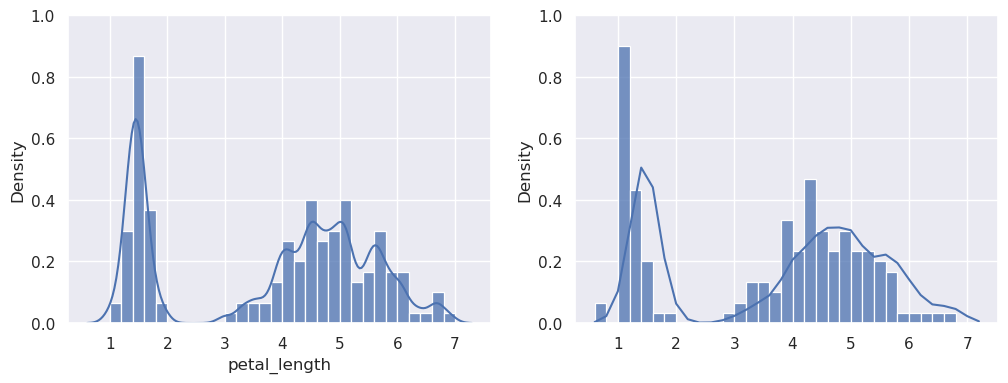

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# original data distribution
sns.histplot(ax = axs[0], data = iris, x = "petal_length", binwidth = bin_width, stat = 'density')
sns.kdeplot(ax = axs[0], data = iris,  x = 'petal_length', bw_adjust = bin_width);
axs[0].set_ylim((0, 1))
# sampled data distribujtion
sns.histplot(ax = axs[1], x = my_petalLength, binwidth = bin_width, stat = 'density')
sns.lineplot(ax = axs[1], x = bins, y = pdf)
axs[1].set_ylim((0, 1));

#### issues with invers sampling !

- sampling is conditioned to the bining resolution
- class label is not known